# Risk Analysis of Covid19 Virus

As the outbreak of coronavirus disease 2019 (COVID-19) progresses, epidemiological data are needed to guide situational awareness and intervention strategies. The enormous impact of the COVID-19 pandemic is obvious. What many still haven’t realized, however, is that the impact on ongoing data science production setups has been dramatic, too. Artificial Intelligence is actively used in identifying high risk patients at an earlier stage and therefore helps to control the spread of the infection in real-time. This becomes particularly important at this time of crisis because real time monitoring is the best option for people to self-isolate and mitigate the spread of the virus.

# Objective 1

 1. Given a person and his/her vital data, predict the viability of a RT-PCR test. Basically predict the probability of risk for the given person. The following data inputs could be provided (you can add 3 more attributes)
 
         a. Name, Age, Gender, Address, Blood Pressure, Cough, Fever, travel history 
         b. Make sure that an optimum position is obtained for the precision and recall metrics. 
         c. Give a brief summary of attributes used, domain knowledge employed, and different data sources utilised and entire EDA process. Complete data analysis should be presented. 
         d. Make an API feature that takes the input of patients as request, and returns the response (probability of infection/ vulnerability).

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Reading of Data

In [2]:
df1=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data1.csv')
df2=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data2.csv')
df3=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data3.csv')
df4=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data4.csv')
df5=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data5.csv')
df6=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data6.csv')
df7=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data7.csv')
df8=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data8.csv')
df9=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data9.csv')
df10=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data10.csv')
df11=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data11.csv')
df12=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data12.csv')
df13=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\raw_data13.csv')

# Data Inspection

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 21 columns):
Patient Number                               17306 non-null float64
State Patient Number                         2457 non-null object
Date Announced                               17364 non-null object
Estimated Onset Date                         0 non-null float64
Age Bracket                                  1670 non-null object
Gender                                       3746 non-null object
Detected City                                2166 non-null object
Detected District                            14978 non-null object
Detected State                               17363 non-null object
State code                                   17363 non-null object
Current Status                               17364 non-null object
Notes                                        16046 non-null object
Contracted from which Patient (Suspected)    1537 non-null object
Nationality                

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 21 columns):
Patient Number                               10585 non-null float64
State Patient Number                         540 non-null object
Date Announced                               10819 non-null object
Estimated Onset Date                         0 non-null float64
Age Bracket                                  676 non-null float64
Gender                                       1567 non-null object
Detected City                                184 non-null object
Detected District                            6220 non-null object
Detected State                               10819 non-null object
State code                                   10819 non-null object
Current Status                               10819 non-null object
Notes                                        10801 non-null object
Contracted from which Patient (Suspected)    101 non-null object
Nationality                    

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 20 columns):
Entry_ID                                     10020 non-null int64
State Patient Number                         5138 non-null object
Date Announced                               10020 non-null object
Age Bracket                                  5183 non-null float64
Gender                                       4654 non-null object
Detected City                                421 non-null object
Detected District                            9934 non-null object
Detected State                               10015 non-null object
State code                                   10015 non-null object
Num Cases                                    10019 non-null float64
Current Status                               10020 non-null object
Contracted from which Patient (Suspected)    241 non-null object
Notes                                        1931 non-null object
Source_1                    

In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18220 entries, 0 to 18219
Data columns (total 20 columns):
Entry_ID                                     18219 non-null float64
State Patient Number                         4071 non-null object
Date Announced                               18220 non-null object
Age Bracket                                  11857 non-null float64
Gender                                       11969 non-null object
Detected City                                1022 non-null object
Detected District                            18033 non-null object
Detected State                               18220 non-null object
State code                                   18220 non-null object
Num Cases                                    18220 non-null int64
Current Status                               18218 non-null object
Contracted from which Patient (Suspected)    29 non-null object
Notes                                        1708 non-null object
Source_1                 

In [7]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20438 entries, 0 to 20437
Data columns (total 20 columns):
Entry_ID                                     20437 non-null float64
State Patient Number                         3349 non-null object
Date Announced                               20438 non-null object
Age Bracket                                  11365 non-null float64
Gender                                       11472 non-null object
Detected City                                1411 non-null object
Detected District                            20184 non-null object
Detected State                               20436 non-null object
State code                                   20436 non-null object
Num Cases                                    20436 non-null float64
Current Status                               20438 non-null object
Contracted from which Patient (Suspected)    14 non-null object
Notes                                        3129 non-null object
Source_1               

In [8]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23423 entries, 0 to 23422
Data columns (total 20 columns):
Entry_ID                                     23423 non-null int64
State Patient Number                         7698 non-null object
Date Announced                               23423 non-null object
Age Bracket                                  7090 non-null object
Gender                                       7140 non-null object
Detected City                                2646 non-null object
Detected District                            23050 non-null object
Detected State                               23422 non-null object
State code                                   23422 non-null object
Num Cases                                    23423 non-null int64
Current Status                               23423 non-null object
Contracted from which Patient (Suspected)    1 non-null object
Notes                                        4775 non-null object
Source_1                       

In [9]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 20 columns):
Entry_ID                                     22770 non-null int64
State Patient Number                         9793 non-null object
Date Announced                               22770 non-null object
Age Bracket                                  9634 non-null object
Gender                                       9677 non-null object
Detected City                                2327 non-null object
Detected District                            22496 non-null object
Detected State                               22770 non-null object
State code                                   22770 non-null object
Num Cases                                    22770 non-null int64
Current Status                               22770 non-null object
Contracted from which Patient (Suspected)    0 non-null float64
Notes                                        6527 non-null object
Source_1                      

In [10]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22795 entries, 0 to 22794
Data columns (total 20 columns):
Entry_ID                                     22795 non-null int64
State Patient Number                         14924 non-null object
Date Announced                               22795 non-null object
Age Bracket                                  12538 non-null float64
Gender                                       12583 non-null object
Detected City                                772 non-null object
Detected District                            22556 non-null object
Detected State                               22795 non-null object
State code                                   22795 non-null object
Num Cases                                    22795 non-null int64
Current Status                               22795 non-null object
Contracted from which Patient (Suspected)    0 non-null float64
Notes                                        12408 non-null object
Source_1                  

In [11]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26895 entries, 0 to 26894
Data columns (total 20 columns):
Entry_ID                                     26895 non-null int64
State Patient Number                         20257 non-null object
Date Announced                               26895 non-null object
Age Bracket                                  15309 non-null object
Gender                                       15311 non-null object
Detected City                                145 non-null object
Detected District                            26737 non-null object
Detected State                               26895 non-null object
State code                                   26895 non-null object
Num Cases                                    26895 non-null int64
Current Status                               26895 non-null object
Contracted from which Patient (Suspected)    0 non-null float64
Notes                                        15685 non-null object
Source_1                   

In [12]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 20 columns):
Entry_ID                                     23110 non-null int64
State Patient Number                         18436 non-null object
Date Announced                               23110 non-null object
Age Bracket                                  14096 non-null float64
Gender                                       14097 non-null object
Detected City                                138 non-null object
Detected District                            23008 non-null object
Detected State                               23110 non-null object
State code                                   23110 non-null object
Num Cases                                    23110 non-null int64
Current Status                               23110 non-null object
Contracted from which Patient (Suspected)    0 non-null float64
Notes                                        14329 non-null object
Source_1                  

In [13]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29045 entries, 0 to 29044
Data columns (total 20 columns):
Entry_ID                                     29045 non-null int64
State Patient Number                         22808 non-null object
Date Announced                               29044 non-null object
Age Bracket                                  16552 non-null object
Gender                                       16548 non-null object
Detected City                                183 non-null object
Detected District                            28894 non-null object
Detected State                               29044 non-null object
State code                                   29044 non-null object
Num Cases                                    29044 non-null float64
Current Status                               29044 non-null object
Contracted from which Patient (Suspected)    1 non-null object
Notes                                        16775 non-null object
Source_1                  

In [14]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22334 entries, 0 to 22333
Data columns (total 20 columns):
Entry_ID                                     22334 non-null int64
State Patient Number                         1288 non-null object
Date Announced                               22334 non-null object
Age Bracket                                  2060 non-null object
Gender                                       2036 non-null object
Detected City                                637 non-null object
Detected District                            21981 non-null object
Detected State                               22334 non-null object
State code                                   22334 non-null object
Num Cases                                    22334 non-null int64
Current Status                               22334 non-null object
Contracted from which Patient (Suspected)    0 non-null float64
Notes                                        3589 non-null object
Source_1                       

In [15]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3189 entries, 0 to 3188
Data columns (total 20 columns):
Entry_ID                                     3189 non-null int64
State Patient Number                         101 non-null object
Date Announced                               1743 non-null object
Age Bracket                                  123 non-null float64
Gender                                       123 non-null object
Detected City                                12 non-null object
Detected District                            1674 non-null object
Detected State                               1699 non-null object
State code                                   1699 non-null object
Num Cases                                    1699 non-null float64
Current Status                               1699 non-null object
Contracted from which Patient (Suspected)    0 non-null float64
Notes                                        257 non-null object
Source_1                                  

# Ckecking of Columns

In [16]:
df1.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [17]:
df2.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [18]:
df3.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [19]:
df4.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [20]:
df5.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [21]:
df6.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [22]:
df7.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [23]:
df8.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [24]:
df9.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [25]:
df10.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [26]:
df11.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [27]:
df12.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [28]:
df13.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

# Matching of Columns

In [29]:
df1=df1.rename(columns={'Num cases':'Num Cases'})
df2=df2.rename(columns={'Num cases':'Num Cases'})

In [30]:
df1.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [31]:
df2.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

# Retain Necessary Columns

In [32]:
df1=df1.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df2=df2.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df3=df3.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df4=df4.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df5=df5.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df6=df6.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df7=df7.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df8=df8.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df9=df9.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df10=df10.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df11=df11.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df12=df12.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]
df13=df13.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State','Current Status']]

# Merge All Dataframes

In [33]:
df=df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])
df.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered


In [34]:
df.tail()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status
3184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250422 entries, 0 to 3188
Data columns (total 8 columns):
Num Cases            248928 non-null float64
Date Announced       248975 non-null object
Age Bracket          108153 non-null object
Gender               110923 non-null object
Detected City        12064 non-null object
Detected District    239745 non-null object
Detected State       248922 non-null object
Current Status       248929 non-null object
dtypes: float64(1), object(7)
memory usage: 17.2+ MB


# Seperation of Day, Month, Year

In [36]:
df['Date Announced'].str.split('/')

0       [30, 01, 2020]
1       [02, 02, 2020]
2       [03, 02, 2020]
3       [02, 03, 2020]
4       [02, 03, 2020]
5       [03, 03, 2020]
6       [04, 03, 2020]
7       [04, 03, 2020]
8       [04, 03, 2020]
9       [04, 03, 2020]
10      [04, 03, 2020]
11      [04, 03, 2020]
12      [04, 03, 2020]
13      [04, 03, 2020]
14      [04, 03, 2020]
15      [04, 03, 2020]
16      [04, 03, 2020]
17      [04, 03, 2020]
18      [04, 03, 2020]
19      [04, 03, 2020]
20      [04, 03, 2020]
21      [04, 03, 2020]
22      [04, 03, 2020]
23      [04, 03, 2020]
24      [04, 03, 2020]
25      [04, 03, 2020]
26      [04, 03, 2020]
27      [04, 03, 2020]
28      [05, 03, 2020]
29      [05, 03, 2020]
             ...      
3159               NaN
3160               NaN
3161               NaN
3162               NaN
3163               NaN
3164               NaN
3165               NaN
3166               NaN
3167               NaN
3168               NaN
3169               NaN
3170               NaN
3171       

In [39]:
Date=df['Date Announced'].str.split('/',expand=True)
Date.head()

,0,1,2
0,30,01,2020
1,02,02,2020
2,03,02,2020
3,02,03,2020
4,02,03,2020


In [40]:
Date.columns=['Day','Month','Year']
Date.head()

,Day,Month,Year
0,30,01,2020
1,02,02,2020
2,03,02,2020
3,02,03,2020
4,02,03,2020


# Add 'Date' to original Dataframe

In [41]:
df=pd.concat([df,Date],axis=1)
df.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,01,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,02,02,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,03,02,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,02,03,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,02,03,2020


In [42]:
df.to_csv('Covid19India.csv')

# Final Data Reading

In [180]:
df=pd.read_csv(r'D:\Velocity Corporate Training\Python\Databases\Healthcare Project\Covid19India\Covid19India.csv')
df.head()

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30-01-2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,02-02-2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,03-02-2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,02-03-2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,02-03-2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0


In [181]:
data=df.iloc[:,1:]
data.head()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30-01-2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1.0,02-02-2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1.0,03-02-2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1.0,02-03-2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1.0,02-03-2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248976 entries, 0 to 248975
Data columns (total 11 columns):
Num Cases            248928 non-null float64
Date Announced       248975 non-null object
Age Bracket          108153 non-null object
Gender               110923 non-null object
Detected City        12064 non-null object
Detected District    239745 non-null object
Detected State       248922 non-null object
Current Status       248929 non-null object
Day                  248975 non-null float64
Month                248975 non-null float64
Year                 248975 non-null float64
dtypes: float64(4), object(7)
memory usage: 20.9+ MB


In [183]:
data.describe()

,Num Cases,Day,Month,Year
count,248928.000000,248975.000000,248975.000000,248975.0
mean,14.286123,15.661661,6.133708,2020.0
std,149.691310,8.333915,1.141585,0.0
min,-11162.000000,1.000000,1.000000,2020.0
25%,1.000000,9.000000,5.000000,2020.0
50%,1.000000,16.000000,7.000000,2020.0
75%,2.000000,22.000000,7.000000,2020.0
max,10320.000000,31.000000,8.000000,2020.0


# Missing Value Handling

In [184]:
data.isnull().sum().sort_values()

Date Announced            1
Day                       1
Month                     1
Year                      1
Current Status           47
Num Cases                48
Detected State           54
Detected District      9231
Gender               138053
Age Bracket          140823
Detected City        236912
dtype: int64

In [185]:
round(data.isnull().sum().sort_values()/len(data)*100,2)    # % wise missing data

Date Announced        0.00
Day                   0.00
Month                 0.00
Year                  0.00
Current Status        0.02
Num Cases             0.02
Detected State        0.02
Detected District     3.71
Gender               55.45
Age Bracket          56.56
Detected City        95.15
dtype: float64

# Null values from Rows

In [186]:
data.isnull().sum(axis=1).sort_values(ascending=False)

224898    11
248975     7
248941     7
248950     7
248949     7
248948     7
248947     7
248946     7
248945     7
248944     7
248943     7
248942     7
248940     7
248952     7
248939     7
248937     7
248936     7
248935     7
248934     7
248933     7
248932     7
248974     7
248951     7
248938     7
248953     7
248954     7
248973     7
248971     7
248970     7
248969     7
          ..
125768     0
125767     0
125766     0
125765     0
125763     0
125788     0
125762     0
125761     0
125760     0
125759     0
125758     0
125757     0
125771     0
125772     0
125773     0
125774     0
125775     0
125776     0
125777     0
125778     0
125779     0
125780     0
125781     0
125782     0
125783     0
125784     0
125785     0
125786     0
125787     0
0          0
Length: 248976, dtype: int64

In [187]:
# Finding Categorical Columns
categorical_feature_mask = data.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['Date Announced', 'Age Bracket', 'Gender', 'Detected City', 'Detected District', 'Detected State', 'Current Status']


In [188]:
data=data.drop(['Date Announced'],axis=1)
data.head()

,Num Cases,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1.0,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1.0,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1.0,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1.0,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0


In [189]:
data['Gender']=data['Gender'].fillna('missing')

In [190]:
data['Detected City']=data['Detected City'].fillna('missing')

In [191]:
data['Detected District']=data['Detected District'].fillna('missing')

In [192]:
data['Detected State']=data['Detected State'].fillna('missing')

In [193]:
# data['Age Bracket']=data['Age Bracket'].fillna(0)

In [194]:
# Finding Numerical Columns
numerical_feature_mask = data.dtypes!=object

# filter categorical columns using mask and turn it into a list
numerical_cols = data.columns[numerical_feature_mask].tolist()
print(numerical_cols)

['Num Cases', 'Day', 'Month', 'Year']


In [195]:
data['Num Cases']=data['Num Cases'].fillna(data['Num Cases'].mean())

In [196]:
data['Day']=data['Day'].fillna(0)

In [197]:
data['Month']=data['Month'].fillna(0)

In [198]:
data['Year']=data['Year'].fillna(0)

# Exploratory Data Analysis

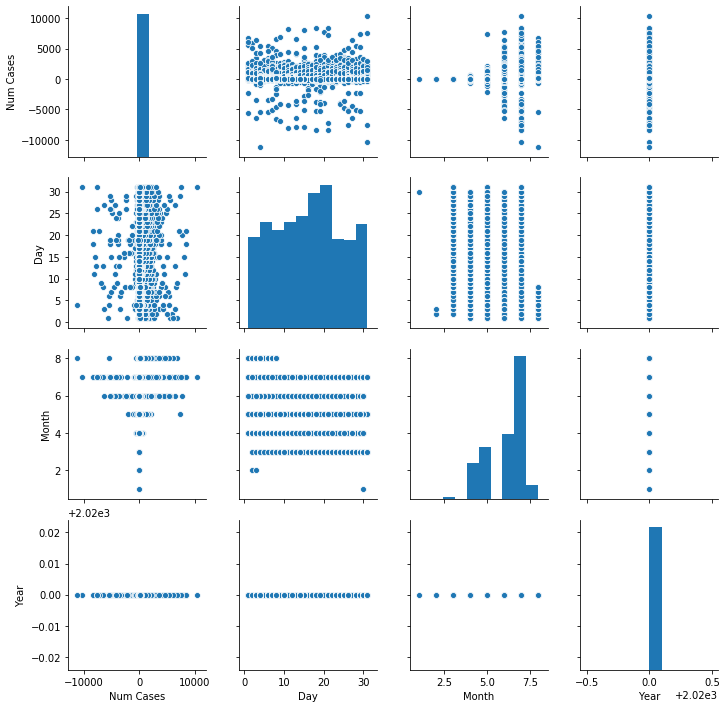

In [155]:
#Pair plot of each column
data_copy=data.copy()
data_copy.dropna(inplace=True)
sns.pairplot(data_copy)

# Monthwise Data

In [217]:
month=data.groupby('Month')['Num Cases'].sum().astype(int)
month

Month
0.0         14
1.0          1
2.0          2
3.0       1635
4.0      36092
5.0     242881
6.0     663178
7.0    1878473
8.0     734624
Name: Num Cases, dtype: int32

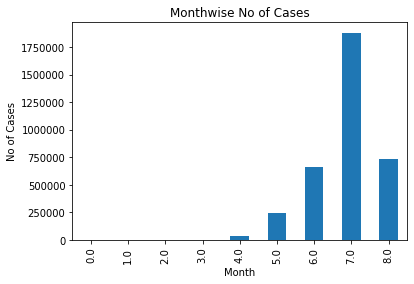

In [218]:
month.plot.bar()
plt.ylabel('No of Cases')
plt.title('Monthwise No of Cases')
plt.show()

In [219]:
month_data=data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
month_data

Month
3.0       1431.0
4.0      33209.0
5.0     155781.0
6.0     395144.0
7.0    1111262.0
8.0     394362.0
Name: Num Cases, dtype: float64

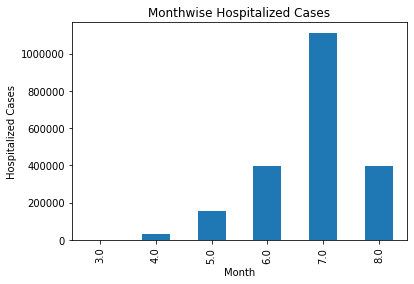

In [220]:
month_data.plot.bar()
plt.ylabel('Hospitalized Cases')
plt.title('Monthwise Hospitalized Cases')
plt.show()

In [221]:
month_data_rec=data[data['Current Status']=='Recovered'].groupby('Month')['Num Cases'].sum()
month_data_rec

Month
1.0         1.000000
2.0         2.000000
3.0       177.000000
4.0      2587.286123
5.0     82832.572246
6.0    255977.000000
7.0    747706.000000
8.0    333555.000000
Name: Num Cases, dtype: float64

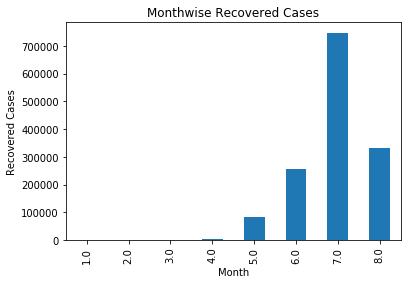

In [222]:
month_data_rec.plot.bar()
plt.ylabel('Recovered Cases')
plt.title('Monthwise Recovered Cases')
plt.show()

In [223]:
month_data_dec=data[data['Current Status']=='Deceased'].groupby('Month')['Num Cases'].sum()
month_data_dec

Month
3.0       23.0
4.0      295.0
5.0     4251.0
6.0    12004.0
7.0    19145.0
8.0     6048.0
Name: Num Cases, dtype: float64

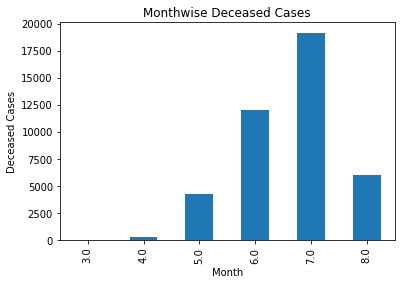

In [224]:
month_data_dec.plot.bar()
plt.ylabel('Deceased Cases')
plt.title('Monthwise Deceased Cases')
plt.show()

In [225]:
month_data_mig=data[data['Current Status']=='Migrated_Other'].groupby('Month')['Num Cases'].sum()
month_data_mig

Month
3.0      3.0
4.0      1.0
5.0      9.0
6.0     52.0
7.0    358.0
8.0     31.0
Name: Num Cases, dtype: float64

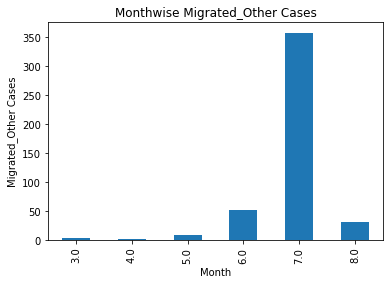

In [226]:
month_data_mig.plot.bar()
plt.ylabel('Migrated_Other Cases')
plt.title('Monthwise Migrated_Other Cases')
plt.show()

# Genderwise Data

In [227]:
data.groupby('Gender')['Num Cases'].sum()

Gender
Non-Binary    1.800000e+01
female        3.894200e+04
male          7.334900e+04
missing       3.444593e+06
Name: Num Cases, dtype: float64

In [228]:
data['Gender']=data['Gender'].replace({'F':'female','Femal e':'female','M':'male','M,':'male','M ':'male'})

In [229]:
Gender_Data=data.groupby('Gender')['Num Cases'].sum()
Gender_Data.astype(int)

Gender
Non-Binary         18
female          38942
male            73349
missing       3444592
Name: Num Cases, dtype: int32

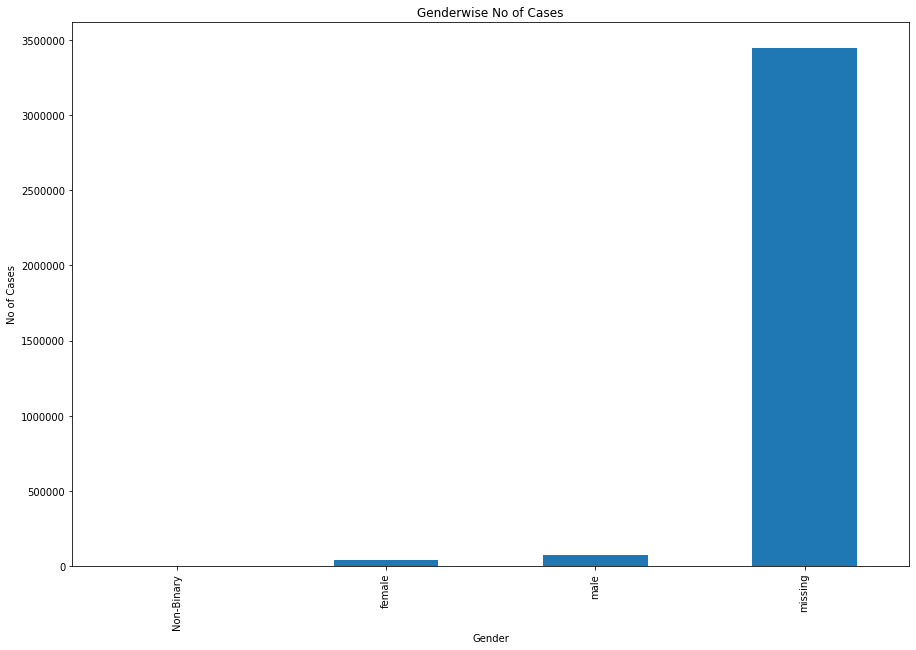

In [239]:
Gender_Data.plot.bar(figsize=(15,10))
plt.ylabel('No of Cases')
plt.title('Genderwise No of Cases')
plt.show()

# Agewise Data

In [232]:
data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False)

Age Bracket
30          2754.0
35          2502.0
40          2455.0
45          2311.0
25          2280.0
28          2242.0
32          2218.0
26          2020.0
50          1916.0
24          1902.0
27          1900.0
38          1857.0
55          1854.0
29          1765.0
36          1717.0
42          1676.0
34          1659.0
48          1611.0
23          1607.0
60          1590.0
33          1566.0
22          1496.0
65          1438.0
31          1409.0
52          1398.0
37          1379.0
39          1358.0
20          1337.0
43          1245.0
46          1213.0
             ...  
0.7            2.0
96.0           2.0
2 Months       2.0
99.0           1.0
9 Month        1.0
9 Months       1.0
9.5            1.0
94.0           1.0
93.0           1.0
29.6           1.0
0.4            1.0
0.25           1.0
91.0           1.0
98             1.0
8 month        1.0
5 Months       1.0
6 Months       1.0
54.9           1.0
5 months       1.0
0.01           1.0
4.5            1.0


In [237]:
Age=data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
age=Age.astype(int)
age

Age Bracket
30    2754
35    2502
40    2455
45    2311
25    2280
28    2242
32    2218
26    2020
50    1916
24    1902
Name: Num Cases, dtype: int32

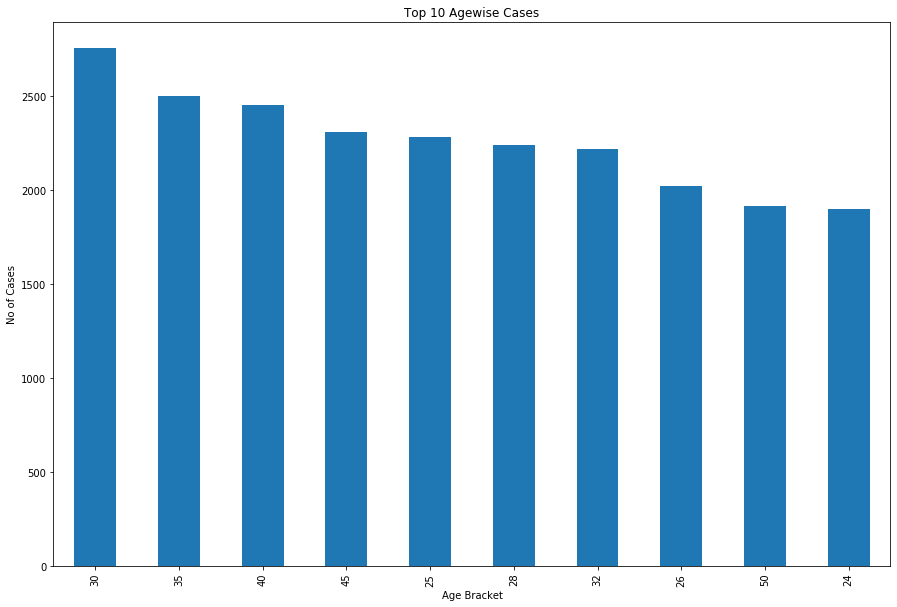

In [240]:
age.plot.bar(figsize=(15,10))
plt.ylabel('No of Cases')
plt.title('Top 10 Agewise Cases')
plt.show()

# Statuswise Data

In [241]:
status=data.groupby('Current Status')['Num Cases'].sum().sort_values(ascending=False)
status.astype(int)

Current Status
Hospitalized      2091189
Recovered         1422837
Deceased            41766
Migrated_Other        454
Migrated                5
Migrated_other          3
Name: Num Cases, dtype: int32

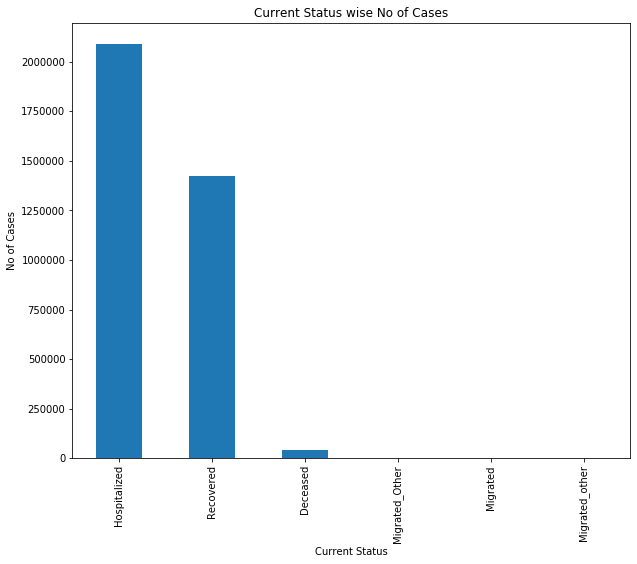

In [244]:
status.plot.bar(figsize=(10,8))
plt.ylabel('No of Cases')
plt.title('Current Status wise No of Cases')
plt.show()

# Statewise Data

In [245]:
state=data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
state

Detected State
Maharashtra                                 490248.0
Tamil Nadu                                  285017.0
Andhra Pradesh                              206958.0
Karnataka                                   164852.0
Delhi                                       142719.0
Uttar Pradesh                               113369.0
West Bengal                                  89660.0
Telangana                                    77511.0
Bihar                                        71793.0
Gujarat                                      68880.0
Assam                                        55497.0
Rajasthan                                    50652.0
Odisha                                       44192.0
Haryana                                      40042.0
Madhya Pradesh                               37296.0
Kerala                                       31639.0
Jammu and Kashmir                            23926.0
Punjab                                       21928.0
Jharkhand                      

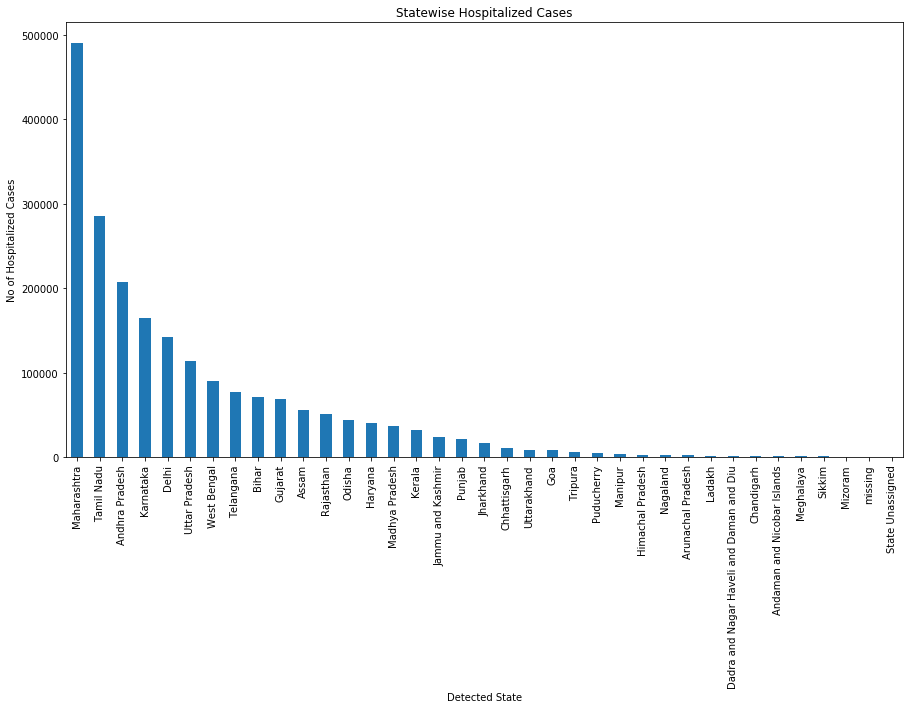

In [258]:
state.plot.bar(figsize=(15,8))
plt.ylabel('No of Hospitalized Cases')
plt.title('Statewise Hospitalized Cases')
plt.show()

In [247]:
state1=data[data['Current Status']=='Recovered'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
state1

Detected State
Maharashtra                                 326096.000000
Tamil Nadu                                  226561.000000
Delhi                                       127357.000000
Andhra Pradesh                              120235.000000
Karnataka                                    84111.000000
Uttar Pradesh                                66515.000000
West Bengal                                  62958.000000
Telangana                                    54015.000000
Gujarat                                      51480.000000
Bihar                                        46209.000000
Assam                                        38783.000000
Rajasthan                                    35684.000000
Haryana                                      33257.000000
Odisha                                       28663.000000
Madhya Pradesh                               27319.000000
Kerala                                       18863.000000
Jammu and Kashmir                            16081.000000

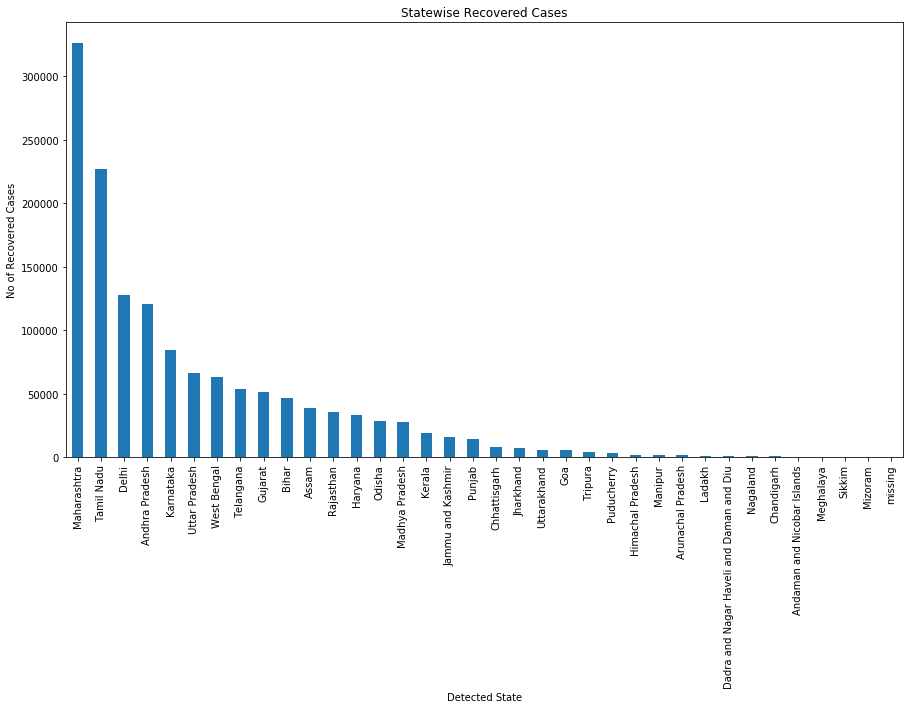

In [257]:
state1.plot.bar(figsize=(15,8))
plt.ylabel('No of Recovered Cases')
plt.title('Statewise Recovered Cases')
plt.show()

In [251]:
state2=data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
state2

Detected State
Maharashtra                                 16761.0
Tamil Nadu                                   4667.0
Delhi                                        4029.0
Karnataka                                    2990.0
Gujarat                                      2457.0
Uttar Pradesh                                1952.0
West Bengal                                  1937.0
Andhra Pradesh                               1811.0
Madhya Pradesh                                861.0
Rajasthan                                     736.0
Telangana                                     591.0
Punjab                                        523.0
Haryana                                       464.0
Jammu and Kashmir                             444.0
Bihar                                         399.0
Odisha                                        292.0
Jharkhand                                     148.0
Assam                                         131.0
Uttarakhand                                   112

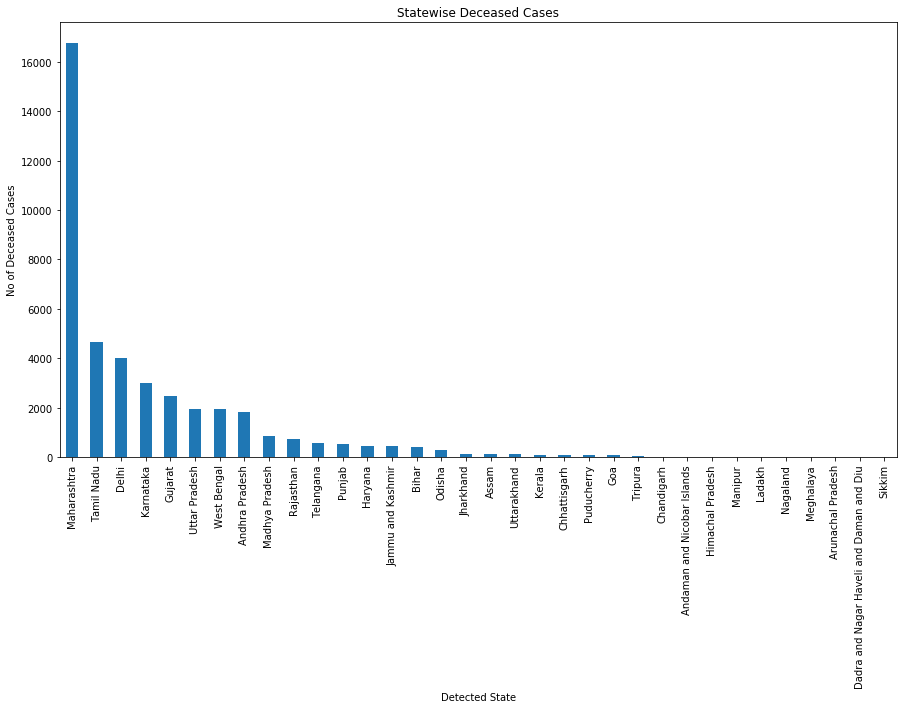

In [256]:
state2.plot.bar(figsize=(15,8))
plt.ylabel('No of Deceased Cases')
plt.title('Statewise Deceased Cases')
plt.show()

In [253]:
state3=data[data['Current Status']=='Migrated_Other'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
state3

Detected State
Maharashtra                                 304.0
Kerala                                       39.0
Uttarakhand                                  38.0
Himachal Pradesh                             28.0
Tripura                                      18.0
Dadra and Nagar Haveli and Daman and Diu     10.0
Karnataka                                     9.0
Assam                                         3.0
Nagaland                                      2.0
Mizoram                                       1.0
Chandigarh                                    1.0
Bihar                                         1.0
Sikkim                                        0.0
Andaman and Nicobar Islands                   0.0
Name: Num Cases, dtype: float64

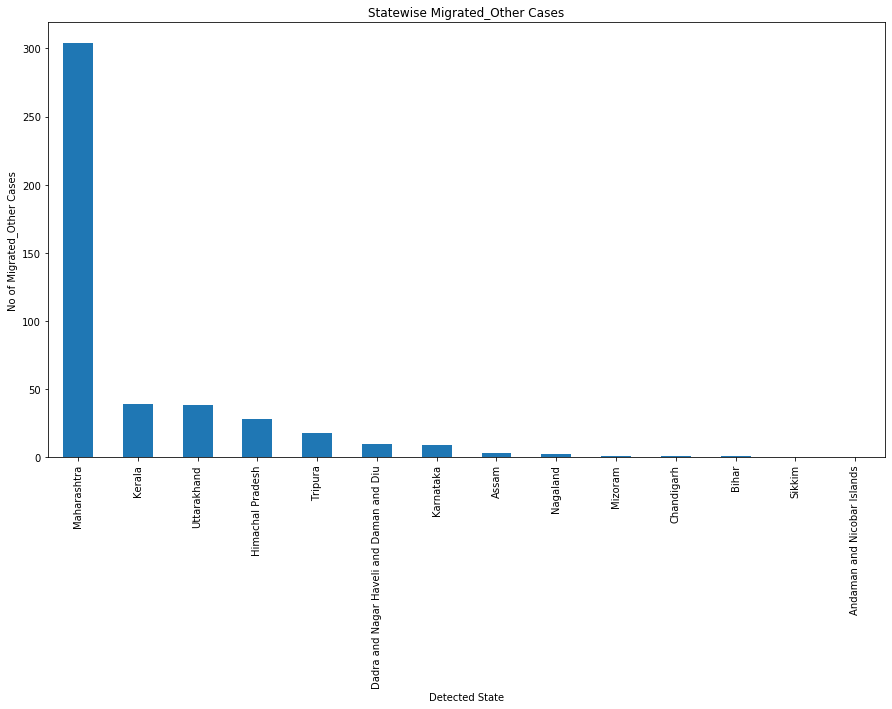

In [255]:
state3.plot.bar(figsize=(15,8))
plt.ylabel('No of Migrated_Other Cases')
plt.title('Statewise Migrated_Other Cases')
plt.show()

# Daywise Data

In [259]:
day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Day'])['Num Cases'].sum()
day

Month  Day 
3.0    4.0         5.0
       5.0         1.0
       7.0         2.0
       9.0         4.0
       10.0        4.0
       11.0        8.0
       12.0        4.0
       13.0        6.0
       14.0       11.0
       15.0        8.0
       16.0       12.0
       17.0       14.0
       18.0       22.0
       19.0       21.0
       20.0       52.0
       21.0       67.0
       22.0       59.0
       23.0       82.0
       24.0       63.0
       25.0       75.0
       26.0       58.0
       27.0      140.0
       28.0      123.0
       29.0      106.0
       30.0      178.0
       31.0      306.0
4.0    1.0       423.0
       2.0       485.0
       3.0       556.0
       4.0       576.0
                ...   
7.0    10.0    27749.0
       11.0    27757.0
       12.0    29106.0
       13.0    28178.0
       14.0    29917.0
       15.0    32607.0
       16.0    35468.0
       17.0    34824.0
       18.0    37411.0
       19.0    40235.0
       20.0    36806.0
       21.0    39170.0

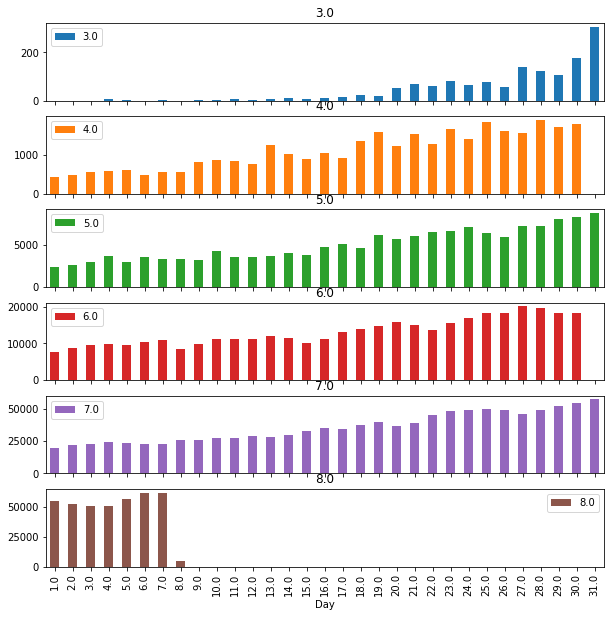

In [262]:
day.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))
plt.show()

In [263]:
day1=data[data['Current Status']=='Recovered'].groupby(['Month','Day'])['Num Cases'].sum()
day1

Month  Day 
1.0    30.0        1.0
2.0    2.0         1.0
       3.0         1.0
3.0    2.0         2.0
       3.0         1.0
       4.0        17.0
       5.0         1.0
       6.0         1.0
       7.0         1.0
       8.0         5.0
       9.0         5.0
       10.0       11.0
       12.0        4.0
       13.0        3.0
       15.0        2.0
       16.0        2.0
       17.0        5.0
       18.0        3.0
       19.0        5.0
       20.0        6.0
       21.0        8.0
       22.0        8.0
       23.0        9.0
       24.0       10.0
       25.0       10.0
       26.0       13.0
       27.0       11.0
       28.0       11.0
       29.0       13.0
       30.0        8.0
                ...   
7.0    10.0    20289.0
       11.0    19981.0
       12.0    18198.0
       13.0    17683.0
       14.0    20976.0
       15.0    20646.0
       16.0    22867.0
       17.0    17486.0
       18.0    23582.0
       19.0    22730.0
       20.0    24303.0
       21.0    27589.0

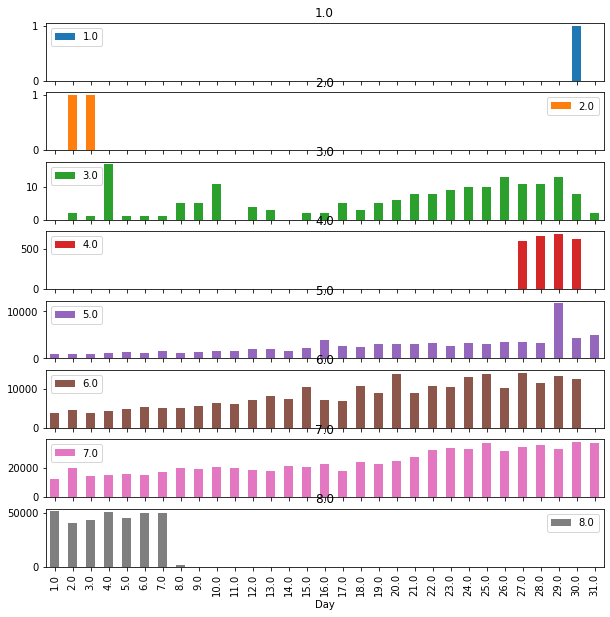

In [264]:
day1.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))
plt.show()

In [265]:
day2=data[data['Current Status']=='Deceased'].groupby(['Month','Day'])['Num Cases'].sum()
day2

Month  Day 
3.0    12.0       2.0
       13.0       1.0
       19.0       1.0
       21.0       3.0
       22.0       2.0
       23.0       3.0
       24.0       1.0
       25.0       1.0
       26.0       2.0
       27.0       2.0
       28.0       2.0
       29.0       1.0
       30.0       1.0
       31.0       1.0
4.0    2.0        1.0
       3.0        4.0
       4.0        3.0
       5.0        3.0
       7.0        3.0
       8.0        1.0
       9.0        1.0
       10.0       1.0
       11.0       1.0
       15.0       2.0
       18.0       1.0
       19.0       1.0
       27.0      58.0
       28.0      69.0
       29.0      71.0
       30.0      75.0
                ...  
7.0    10.0     520.0
       11.0     541.0
       12.0     497.0
       13.0     541.0
       14.0     582.0
       15.0     614.0
       16.0     680.0
       17.0     676.0
       18.0     543.0
       19.0     675.0
       20.0     596.0
       21.0     671.0
       22.0    1130.0
       23.0     755.

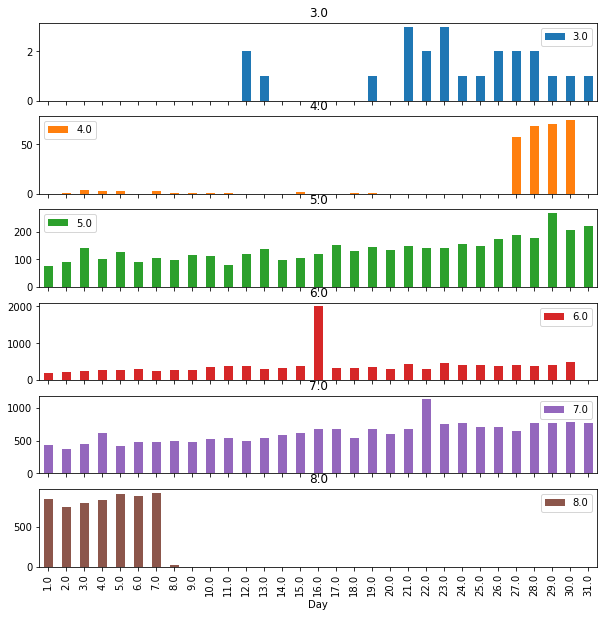

In [266]:
day2.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))
plt.show()

In [267]:
day3=data[data['Current Status']=='Migrated_Other'].groupby(['Month','Day'])['Num Cases'].sum()
day3

Month  Day 
3.0    14.0      3.0
4.0    27.0      1.0
5.0    10.0      0.0
       20.0      3.0
       23.0      1.0
       24.0      1.0
       25.0      3.0
       29.0      1.0
6.0    3.0       0.0
       4.0       1.0
       6.0       2.0
       8.0       2.0
       11.0      7.0
       13.0     14.0
       14.0      2.0
       15.0      3.0
       16.0      1.0
       18.0      1.0
       19.0      4.0
       20.0      1.0
       23.0      4.0
       26.0      1.0
       29.0      4.0
       30.0      5.0
7.0    5.0      17.0
       6.0      13.0
       7.0       2.0
       8.0       1.0
       9.0       1.0
       10.0    264.0
       11.0      6.0
       13.0      2.0
       14.0      7.0
       16.0      1.0
       17.0      3.0
       18.0      6.0
       19.0      3.0
       20.0      2.0
       21.0      1.0
       22.0      7.0
       23.0      1.0
       24.0      2.0
       26.0      1.0
       27.0      2.0
       28.0      1.0
       29.0      4.0
       30.0      8.0
 

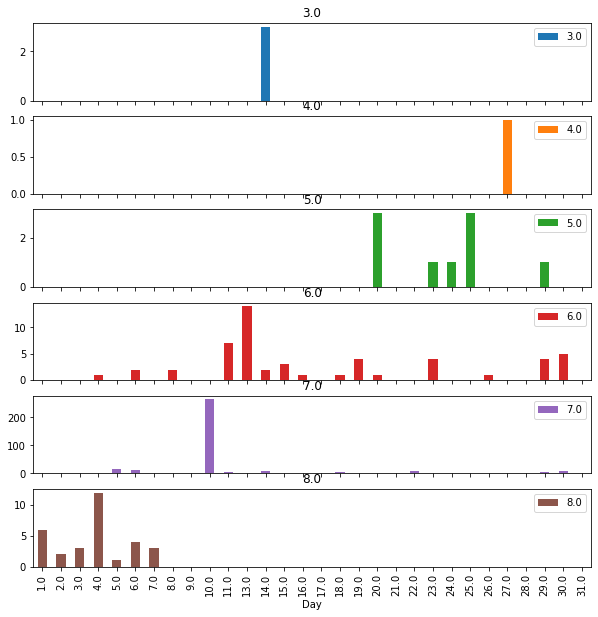

In [268]:
day3.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))
plt.show()